In [1]:
import numpy as np
import numpy.linalg as LA
from matTools import *
from scf2 import NEGF
from matplotlib import pyplot as plt
from scipy import io

In [2]:
negf = NEGF('ethane')

Calculation started at Thu Oct 26 22:57:30 2023
Checking ethane.chk for saved data...
Done!
ORBS:
[1 1 1 1 1 1 1 1 1 2 2 3 3 4 4 5 5 5 5 5 5 5 5 5 6 6 7 7 8 8]
Expecting 18 electrons
Actual:  6.6213738691300685 electrons
Charge is: 0
Multiplicity is: 1
Initial SCF energy:  -79.75148839890554
###################################


In [28]:
negf.setSigma([2], [6], -0.1j, -0.1j)
negf.setVoltage(-5.1, 0)
Fbar = negf.X*(negf.F*27.211386 + negf.sigma12)*negf.X
GamBar1 = negf.X*negf.Gam1*negf.X
D,V = LA.eig(np.asmatrix(Fbar))
D = np.asmatrix(D).T

P1 = np.real(density(V,D,GamBar1, -15, -5.1))
P2 = np.real(densityGrid(Fbar, GamBar1, -15, -5.1, dE=0.1))
P3 = densityComplex(Fbar, GamBar1, -15, -5.1, dE=0.1)


Max imag sigma: 0.100000001
E-field set to 0.0 au
Starting Integration...
Integration done!
(-11.492286676891435-0.006265834590970177j)
(-11.501036108001983-0.0020790639157702456j)
(-9.210834257962308-0.0022571265378616167j)
(-8.924128561678378-0.011773266434775439j)
(-8.935046928279942-0.003985626948704779j)
Starting Integration...
Integration done!


/home/guillaume/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


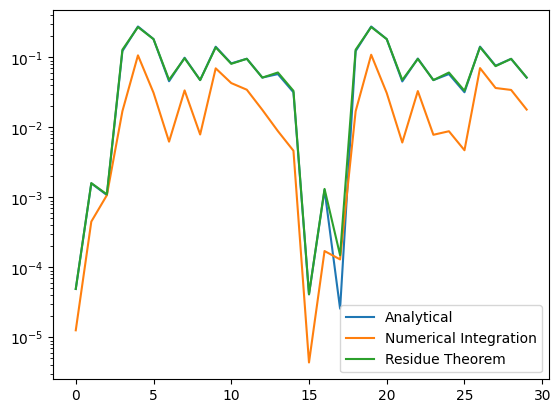

In [29]:
a = np.array([range(len(P1))]).T
plt.semilogy(a, np.diag(P1), a, np.diag(P2),a, np.diag(P3))
plt.legend(('Analytical','Numerical Integration', 'Residue Theorem'))
plt.show()

In [15]:
np.diag(P2-P1)[:4],np.diag(P3-P1)[:4]

(array([-5.40868241e-06,  1.55328422e-03,  2.11907553e-03, -5.55362754e-03]),
 array([1.29847897e-05+6.21463164e-10j, 2.11420944e-03+1.93537129e-08j,
        2.21826640e-03+1.05399166e-08j, 8.99945729e-04-8.09346586e-08j]))

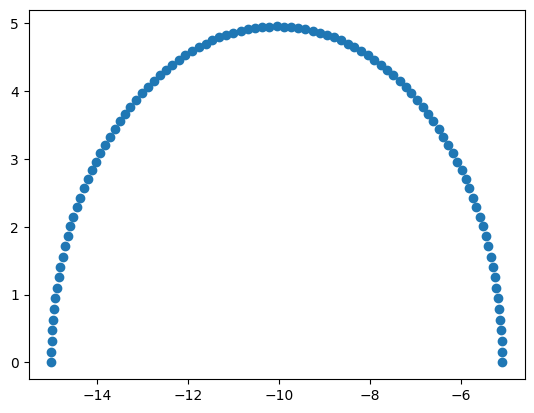

In [6]:
Emin = -15
Emax = -5.1
dE = 0.1

center = (Emin+Emax)/2
r = (Emin-Emax)/2
N = int((Emax-Emin)/dE)
theta = np.linspace(0, np.pi, N)
Egrid = r*np.exp(-1j*theta)+center
dS = abs(Egrid[1]-Egrid[0])
plt.scatter(Egrid.real, Egrid.imag)
plt.show()

In [7]:
Egrid

array([-15.        +0.00000000e+00j, -14.99745677+1.58655309e-01j,
       -14.98982969+3.17147589e-01j, -14.97712661+4.75313978e-01j,
       -14.95936057+6.32991950e-01j, -14.93654983+7.90019480e-01j,
       -14.90871783+9.46235212e-01j, -14.87589317+1.10147862e+00j,
       -14.83810957+1.25559019e+00j, -14.79540587+1.40841155e+00j,
       -14.74782595+1.55978568e+00j, -14.69541869+1.70955702e+00j,
       -14.63823795+1.85757167e+00j, -14.57634248+2.00367755e+00j,
       -14.5097959 +2.14772451e+00j, -14.43866657+2.28956454e+00j,
       -14.36302759+2.42905188e+00j, -14.28295668+2.56604321e+00j,
       -14.19853612+2.70039776e+00j, -14.10985266+2.83197747e+00j,
       -14.01699743+2.96064713e+00j, -13.92006584+3.08627452e+00j,
       -13.81915749+3.20873056e+00j, -13.71437609+3.32788941e+00j,
       -13.60582928+3.44362863e+00j, -13.49362863+3.55582928e+00j,
       -13.37788941+3.66437609e+00j, -13.25873056+3.76915749e+00j,
       -13.13627452+3.87006584e+00j, -13.01064713+3.96699743e+

In [7]:
mat = io.loadmat('tau.mat')
gmat = io.loadmat('g.mat')
formSigmaE(np.arange(264), np.asmatrix(gmat['GE1']), np.asmatrix(mat['tau1'])*27.211386, -5.1, np.asmatrix(mat['stau1']), 264)

matrix([[ 2.12573237e+01-15.15283101j,  3.72361630e+01-31.47949617j,
          2.61012678e+01-12.64504469j, ...,  1.36848980e+00 +1.06030587j,
          5.16748893e-01 -1.69017983j,  1.89074780e+00 -1.733412j  ],
        [ 3.72361630e+01-31.47949617j,  6.30514018e+01-68.18476971j,
          5.18955391e+01-22.41936733j, ...,  2.84047505e+00 +2.07814528j,
          1.40767948e+00 -3.8157357j ,  4.35892677e+00 -3.94306755j],
        [ 2.61012678e+01-12.64504469j,  5.18955391e+01-22.41936733j,
          1.38174772e+01-23.9967188j , ...,  1.11866138e+00 +1.78556153j,
         -1.34921282e-01 -1.5307603j ,  7.98573143e-01 -1.05853523j],
        ...,
        [ 1.36848980e+00 +1.06030587j,  2.84047505e+00 +2.07814528j,
          1.11866138e+00 +1.78556153j, ..., -2.01177700e+01-10.89495398j,
          5.54910479e+00 +4.76545204j, -2.08048684e-01 -0.29765321j],
        [ 5.16748893e-01 -1.69017983j,  1.40767948e+00 -3.8157357j ,
         -1.34921282e-01 -1.5307603j , ...,  5.54910479e+00 +4.765

In [9]:
 coup1=E*stau1-tau1*hartree_unit
coup2=E*stau2-tau2*hartree_unit;
G1=GE1; G2=GE2;
sig1_Ef=coup1*G1*coup1'; sig2_Ef=coup2*G2*coup2';

SyntaxError: invalid syntax (2216157415.py, line 4)

In [ ]:
type(mat['tau1'])

In [11]:
E = 2
Gam = np.asmatrix([[0.1,0, 0], [0,0, 0], [0, 0, 0.1]])
sig = -1j*Gam/2
H = np.asmatrix([[0, 0.1, 0], [0.1, 1, 0.1], [0, 0.1, 0]])
D, V = LA.eig(H+sig)
#D = np.array([1+0.1j, -2+0.1j, 3-0.1j])
#V = np.asmatrix([[1/np.sqrt(3), 1/np.sqrt(3), -1/np.sqrt(3)], [1/np.sqrt(2), 1/np.sqrt(2), 0], [1/np.sqrt(2), -1/np.sqrt(2), 0]])
for ind, E in enumerate(D):
    Y = V[:, ind] * V.getH()[ind,:]
    eps = 1e-9
    Gr = np.asmatrix(np.diag(1/(E+eps-D)))
    Gr = V*Gr*V.getH()
    #print(Gr*1e-10)
    #print(Y)
    Ga = np.asmatrix(np.diag(1/(E+eps-np.conj(D))))
    Ga = V*Ga*V.getH()
    print(Y*Gam*Ga)
    print(Gr*Gam*Ga*-1*eps)


Gr = np.asmatrix(np.diag((E-D)/(E-D)))

[[ 0.00088709+0.00945949j  0.00444657+0.09599428j  0.00088709+0.00945949j]
 [ 0.00440389+0.09688138j -0.00175726+0.98091108j  0.00440389+0.09688138j]
 [ 0.00088709+0.00945949j  0.00444657+0.09599428j  0.00088709+0.00945949j]]
[[-0.00088709-0.00945949j -0.00444657-0.09599428j -0.00088709-0.00945949j]
 [-0.00440388-0.09688137j  0.00175726-0.98091099j -0.00440388-0.09688137j]
 [-0.00088709-0.00945949j -0.00444657-0.09599428j -0.00088709-0.00945949j]]
[[ 4.99999961e-09+5.00000000e-01j  1.51995909e-16-1.06154006e-16j
  -5.00000120e-09-5.00000000e-01j]
 [-9.47236355e-17-2.60425927e-17j  1.38915147e-32+3.49534455e-32j
   9.47236355e-17+2.60425927e-17j]
 [-4.99999881e-09-5.00000000e-01j -1.47260249e-16+1.25096646e-16j
   5.00000037e-09+5.00000000e-01j]]
[[-8.51472569e-09-5.00000024e-01j  9.41095983e-10+4.71852857e-09j
   1.48527512e-09+4.99999976e-01j]
 [ 9.32480619e-10+4.76687964e-09j -2.33120128e-10-9.32480465e-10j
   9.32480430e-10+4.76687959e-09j]
 [ 1.48527272e-09+4.99999976e-01j  9.41096

/home/guillaume/anaconda3/envs/NEGFCode/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [8]:
P3

(matrix([[-9.22065848e-06-7.82994719e-07j,
           5.17216802e-05+8.46877438e-06j,
           7.08761964e-05+1.61575510e-05j,
           3.17073326e-06-2.30911883e-05j,
          -4.03957957e-05+8.12670591e-05j,
          -1.63859369e-05+1.91000210e-05j,
           1.99640269e-05+9.96534083e-08j,
          -8.54098645e-05+1.11186360e-05j,
          -1.02246848e-05+1.11128833e-05j,
          -5.40419431e-05-8.36284413e-05j,
          -1.18777571e-04-9.25819701e-05j,
           1.80640693e-05+4.88991773e-05j,
           1.84968726e-05+3.48420235e-05j,
           5.19675401e-06+4.34286040e-05j,
           9.24571060e-06+2.43017144e-05j,
           2.86034002e-06-1.87653625e-06j,
          -1.30495800e-05+2.07486947e-05j,
          -1.37853517e-05+1.69079133e-05j,
          -2.96317168e-06-9.98850330e-06j,
          -2.13045531e-05+6.74335690e-06j,
          -1.06026133e-05-1.76739655e-06j,
          -5.11291006e-06-2.76660323e-05j,
          -1.74411825e-05+5.23520555e-05j,
          -